# Evaluation Project - 9
## Insurance Claims- Fraud Detection
### Problem Statement:
#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 
 
Note: Use the link below to reach to your dataset. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
#importing different libraries required

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Insurance_claim_fraud.csv')

In [4]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [5]:
df.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,...,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,...,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,...,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
print('Number of row',df.shape[0])
print('Number of column',df.shape[1])

Number of row 1000
Number of column 40


In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Statistical Analysis


In [8]:
df.duplicated('policy_number').sum() # This will check if any duplicate entry or duplicate row with same policy_number


0

Let check if any whitespace, 'NA' or '-' exist in dataset.



In [9]:
df.isin([' ','NA','-']).sum().any()


False

In [10]:
df.isin(['?']).sum().any()


True

In [11]:
df=df.replace('?',np.NaN)    #replacing ? with NaN


### Checking Missing values 


In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
authorities_contacted                     0             0.0
total_claim_amount                        0             0.0
injury_claim                            

In [13]:
# Droping unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True) #100% data is missing

Missing value imputation


In [14]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

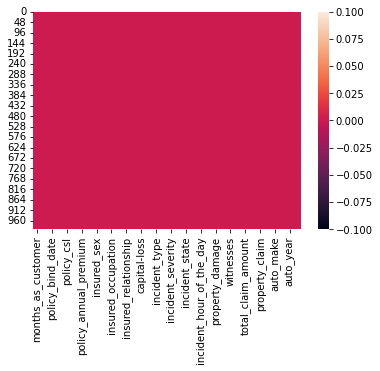

In [15]:
# Heatmap of missing value
sns.heatmap(df.isnull())
plt.show()

There is no missing values now.

Something details on Policy_csl column :

Combined single limit (CSL): CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.
In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
We will split this column into two CSL columns for person and accident.

In [16]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [17]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [18]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [19]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year


In [20]:
# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [21]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [22]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

Spliting feature in categorical and numerical variable



In [23]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [24]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'incident_year', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

## Statistical Matrix


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


In [26]:
df[Category].describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


Start with Enlisting Value counts & Sub-categories of different categorial features available


In [27]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('*'*50)


policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
**************************************************
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
**************************************************
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
**************************************************
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
**************************************************
insured_hobbies
reading           64
exercise        

### Exploring Taget Variavle

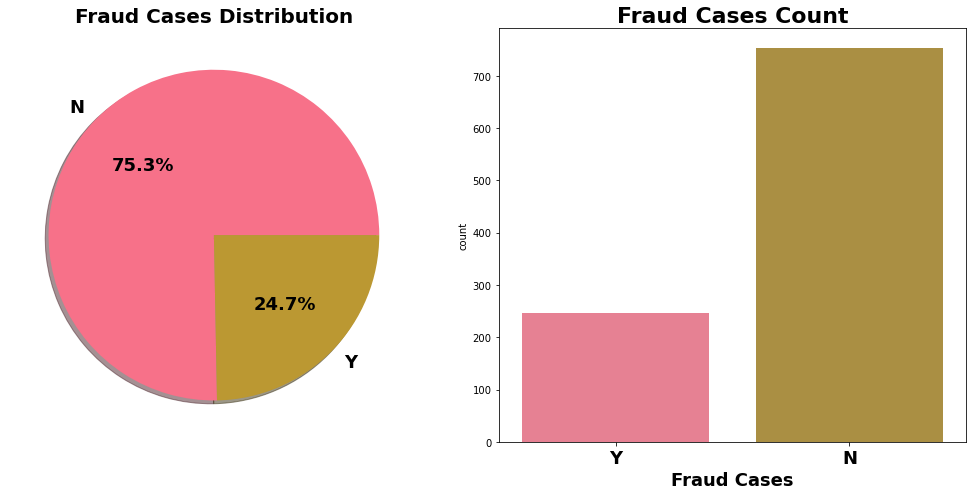

In [28]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

Observation:

Out of all cases around 24.7 % cases are Fraud.
'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.


In [29]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


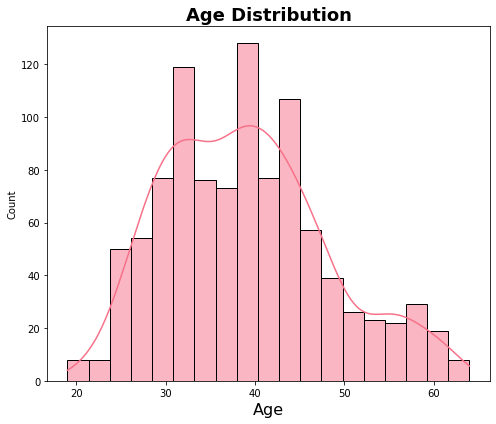

In [30]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True)
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

Observation:

Maximum fraud cases comes from people with age group of 31-50 year.
Very few cases in 60+ year old peoples.

## Policy State Vs Fraud cases

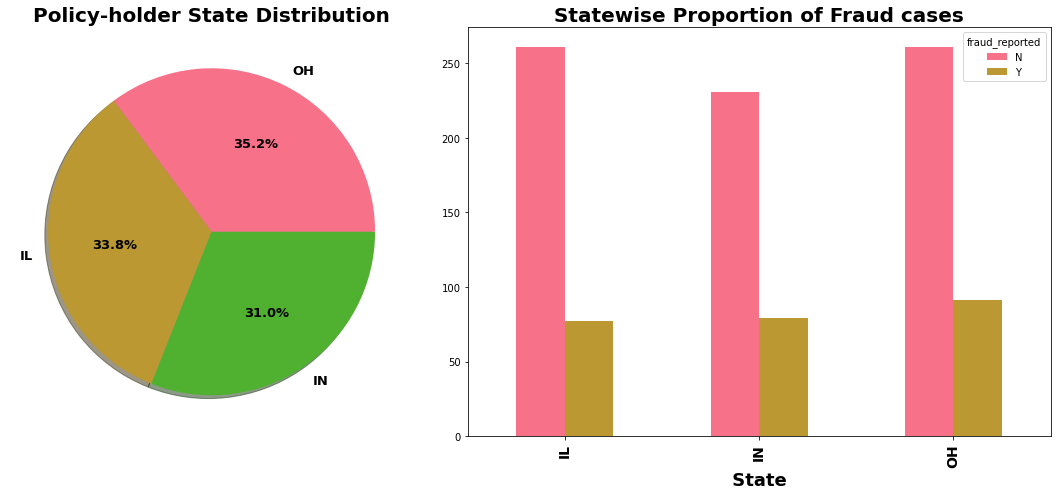

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

Observation:

Almost same amout of cases come from each state.
Maximum fraud cases come from state of Ohio.

## Insured Gender VS Fraud cases

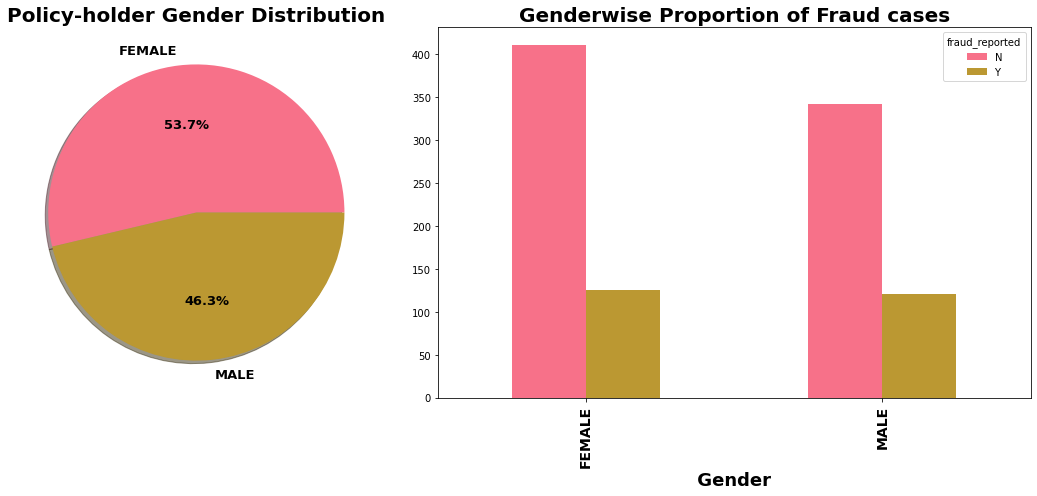

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

Comment :

Number of claims come from female is higher than which reported by male insured.
Almost same amount of fraud cases comes from same gender.


## Education_level vs Fraud cases


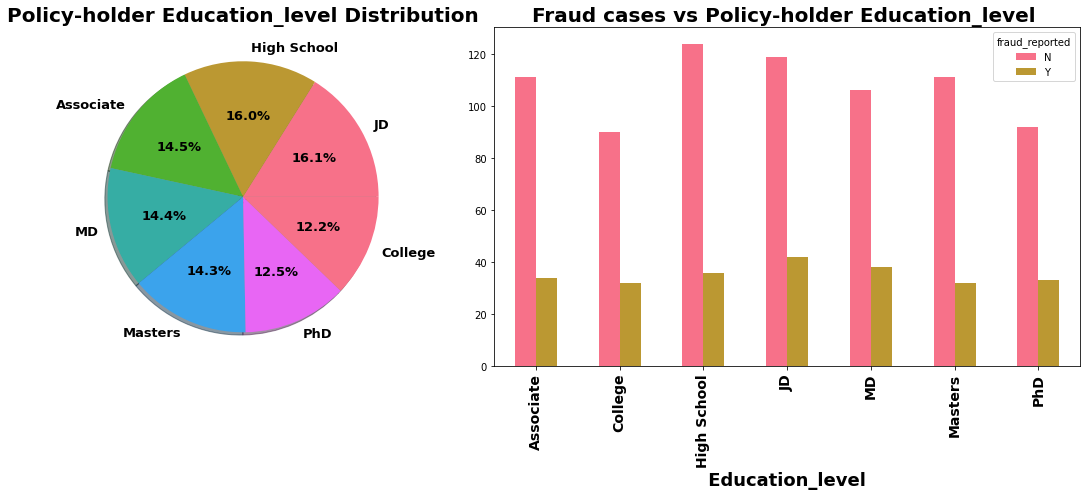

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

Comment :

We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. Education Level is not much important variable for us. We can see maximum in high school.

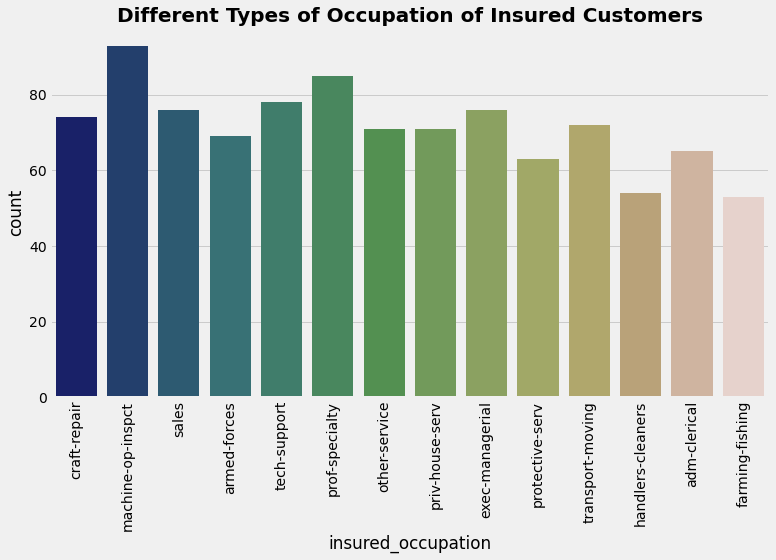

In [34]:
# let's check the insured occupation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

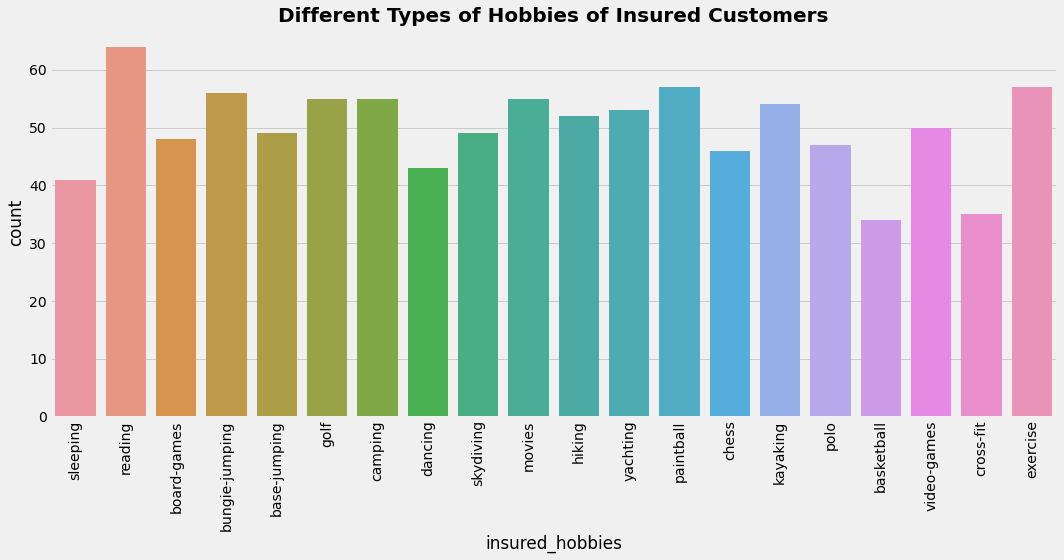

In [35]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['insured_hobbies'])
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

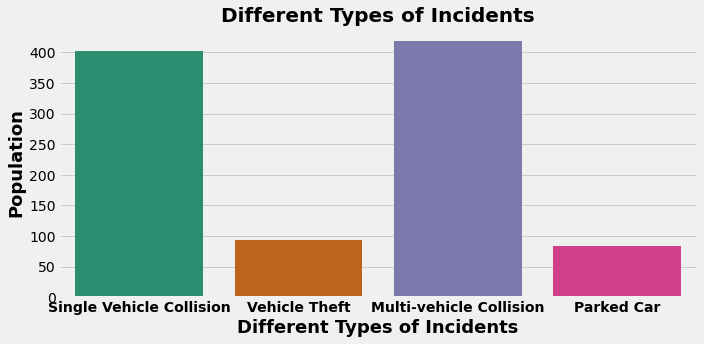

In [36]:
# let's check the incident types
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

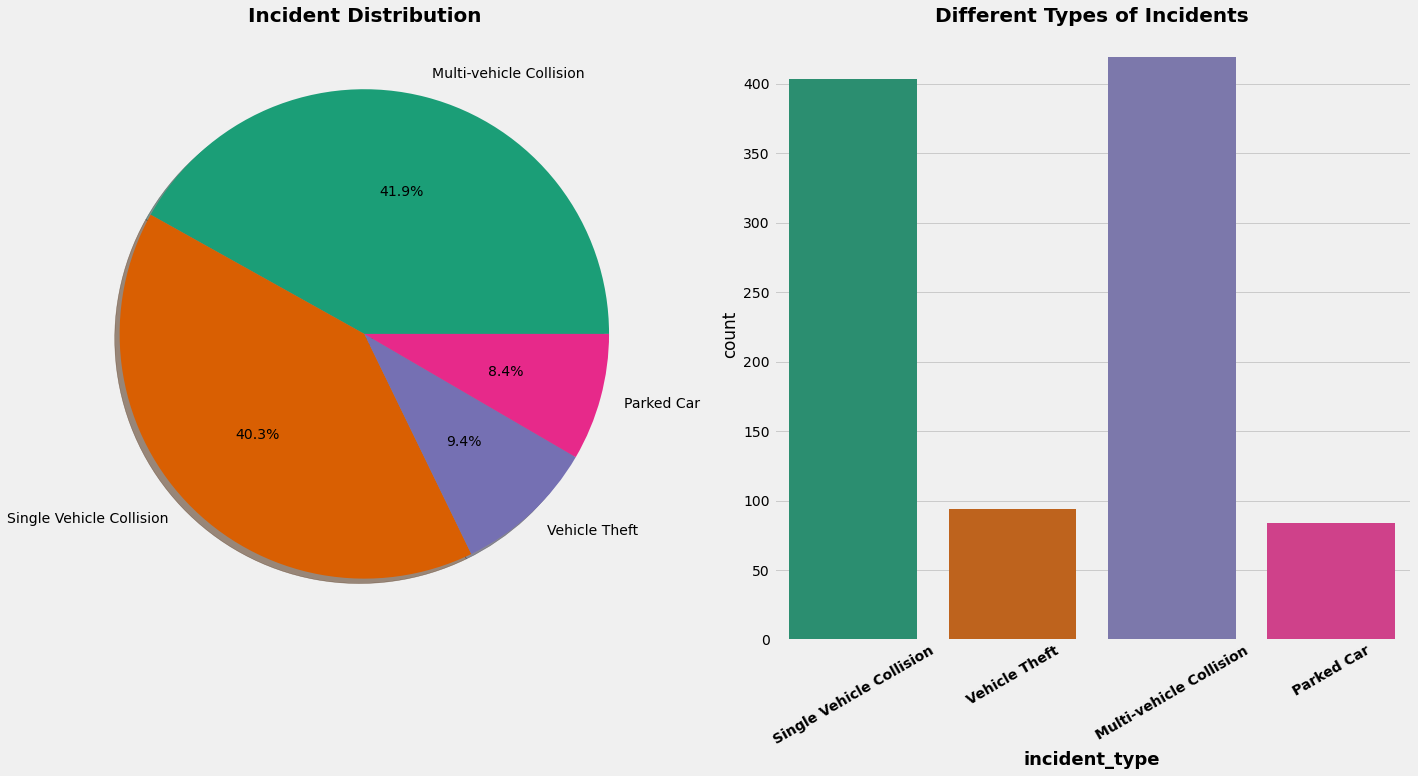

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

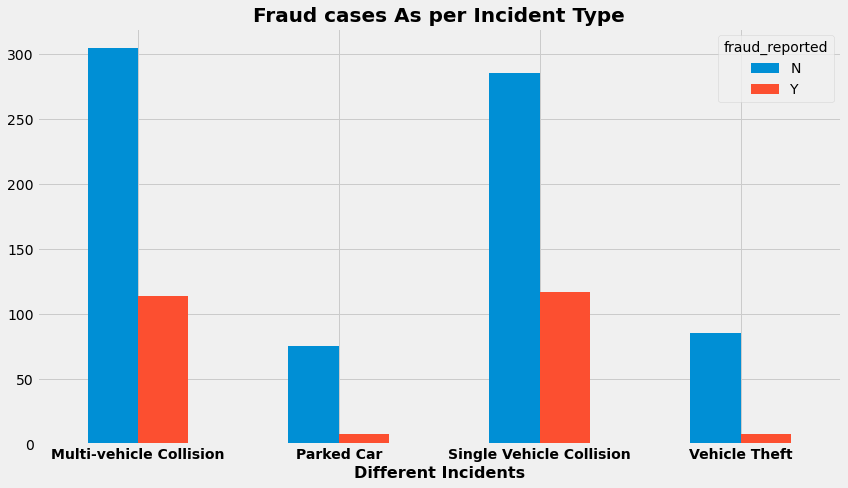

In [38]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

Observation :

Most of case comes from Multi-vehicle and single vehicle collision.
Some claims are due to automobile robbery.
One claim out of three claim is fraud in multi or single vehicle collision incident.
It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim.

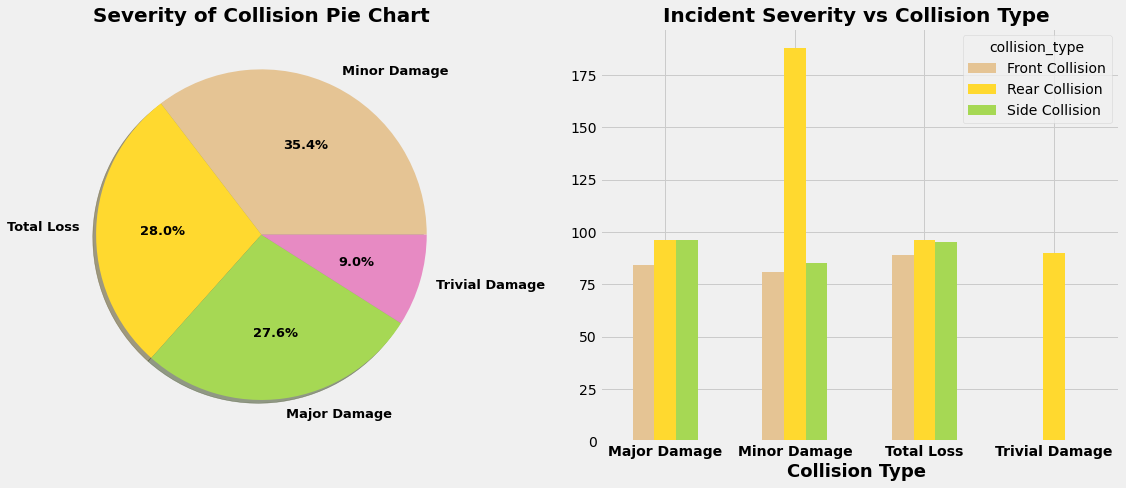

In [39]:
#collision vs incident severity
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [40]:
pd.crosstab(df['incident_type'], df['incident_severity'])

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


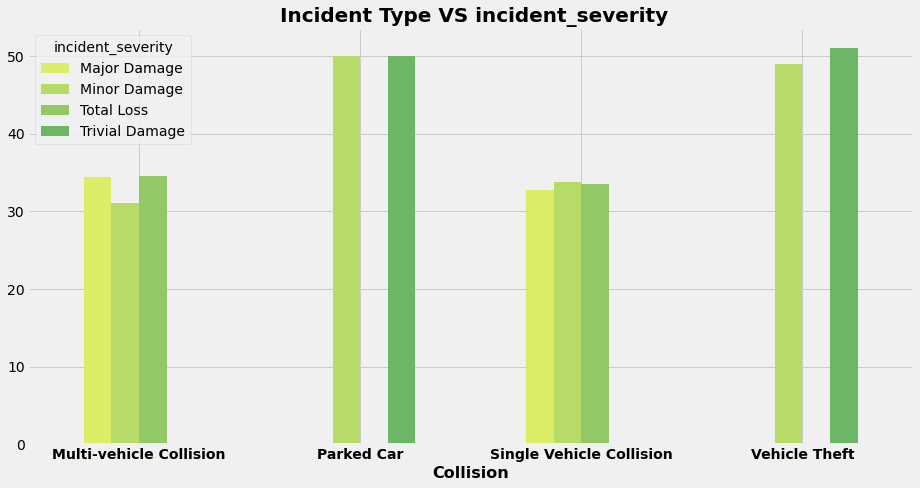

In [41]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

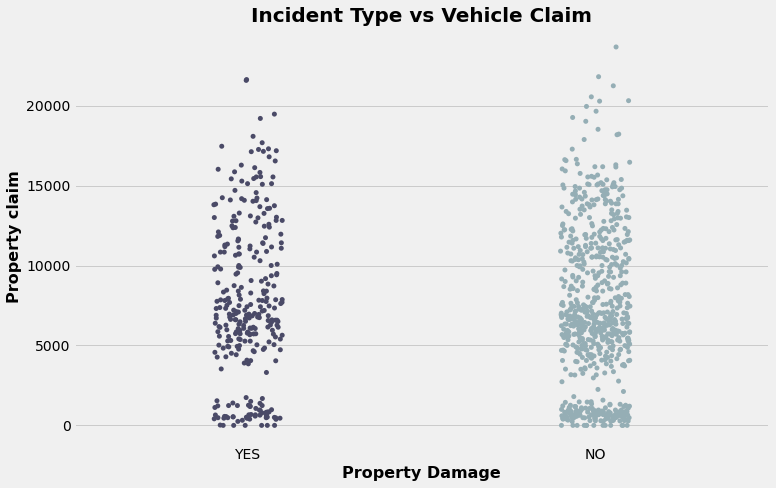

In [42]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

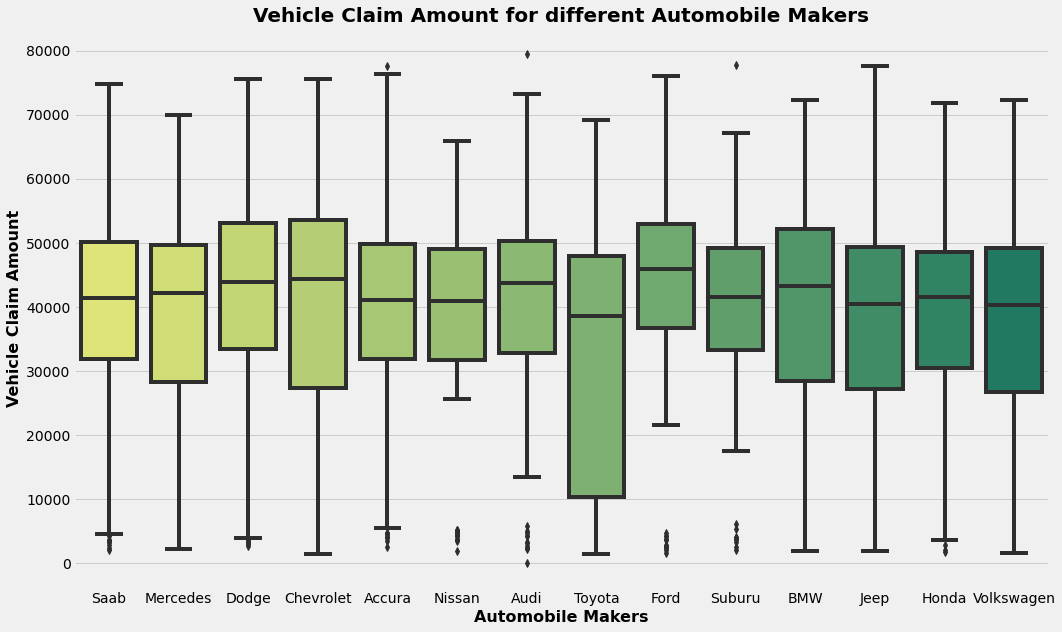

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

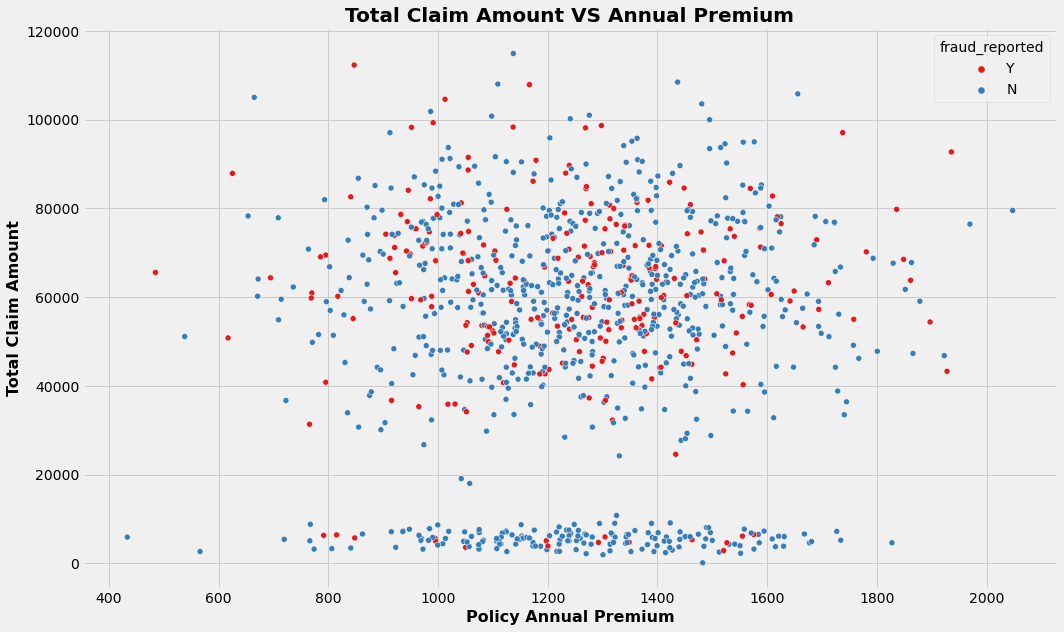

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [45]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year,Automobile_Age
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,250,500,17,10,2014,25,1,2015,11
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,250,500,27,6,2006,21,1,2015,8
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,100,300,9,6,2000,22,2,2015,8
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,25,5,1990,1,10,2015,1
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,500,1000,6,6,2014,17,2,2015,6


## Encoding categorical data


In [46]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [47]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year,Automobile_Age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,1,2,17,10,2014,25,1,2015,11
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,1,2,27,6,2006,21,1,2015,8
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,9,6,2000,22,2,2015,8
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1,2,25,5,1990,1,10,2015,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,6,6,2014,17,2,2015,6


In [48]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_state', 'policy_deductable', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'incident_year', 'Automobile_Age'], float64: ['policy_annual_premium']}

# Feature selection and Engineering


Outliers Detection and Removal

In [49]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [50]:
len(Numerical)


21

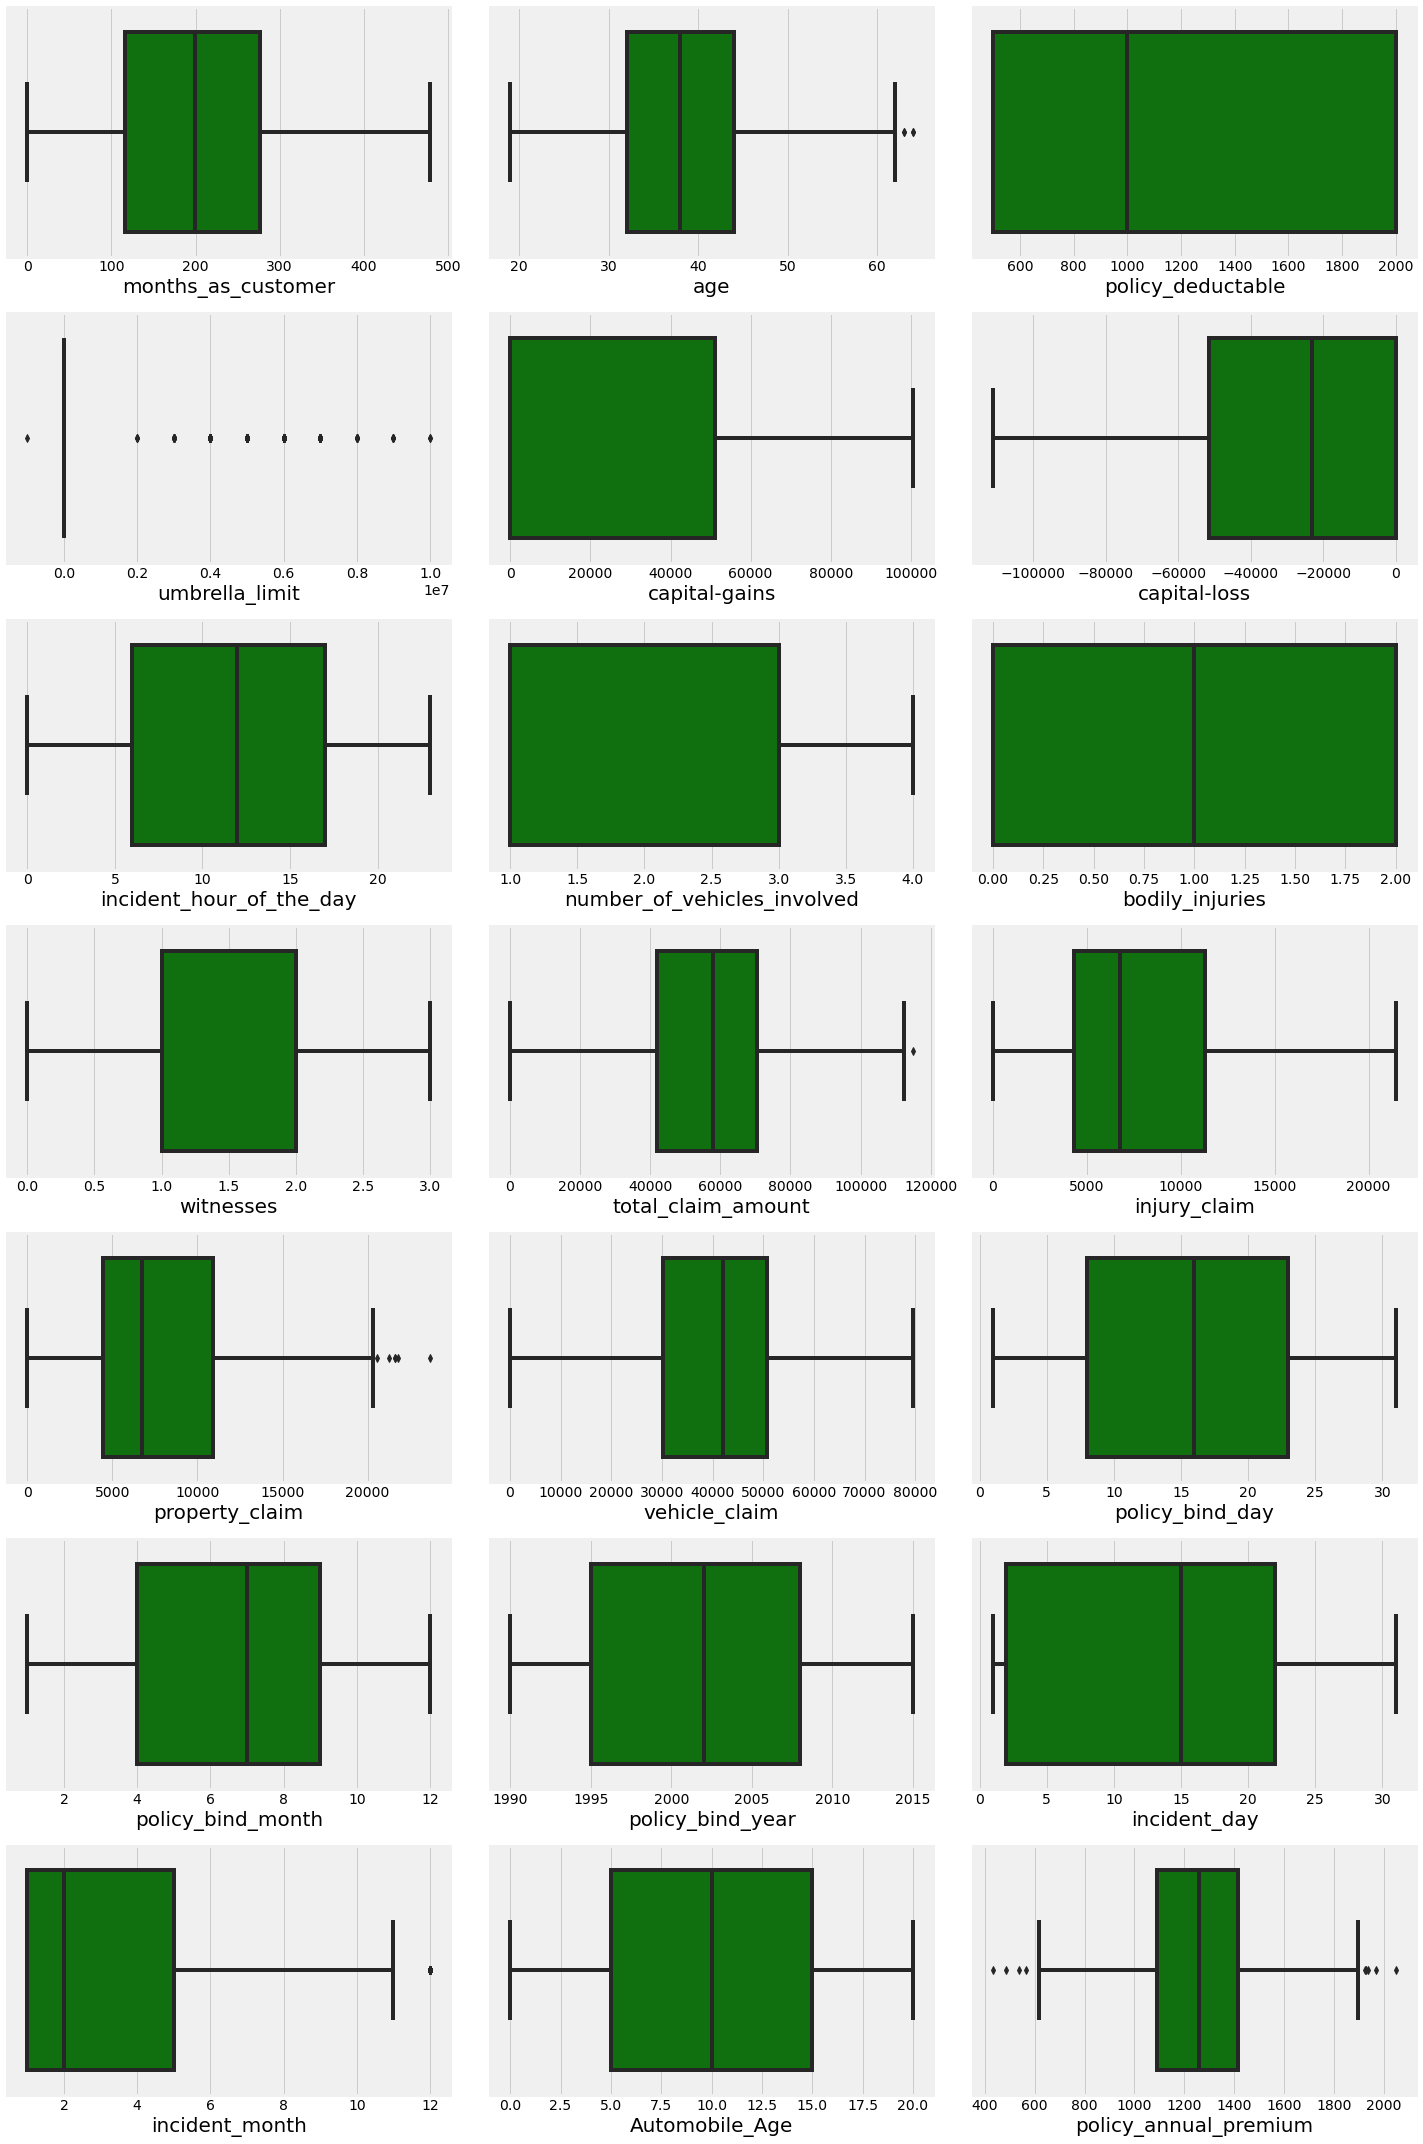

In [51]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [53]:
df[Numerical].skew()


months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
Automobile_Age                 0.048289
policy_annual_premium          0.004402
dtype: float64

In [54]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [55]:
df[skew].skew()


total_claim_amount   -0.510354
vehicle_claim        -0.522718
dtype: float64

# Corrleation

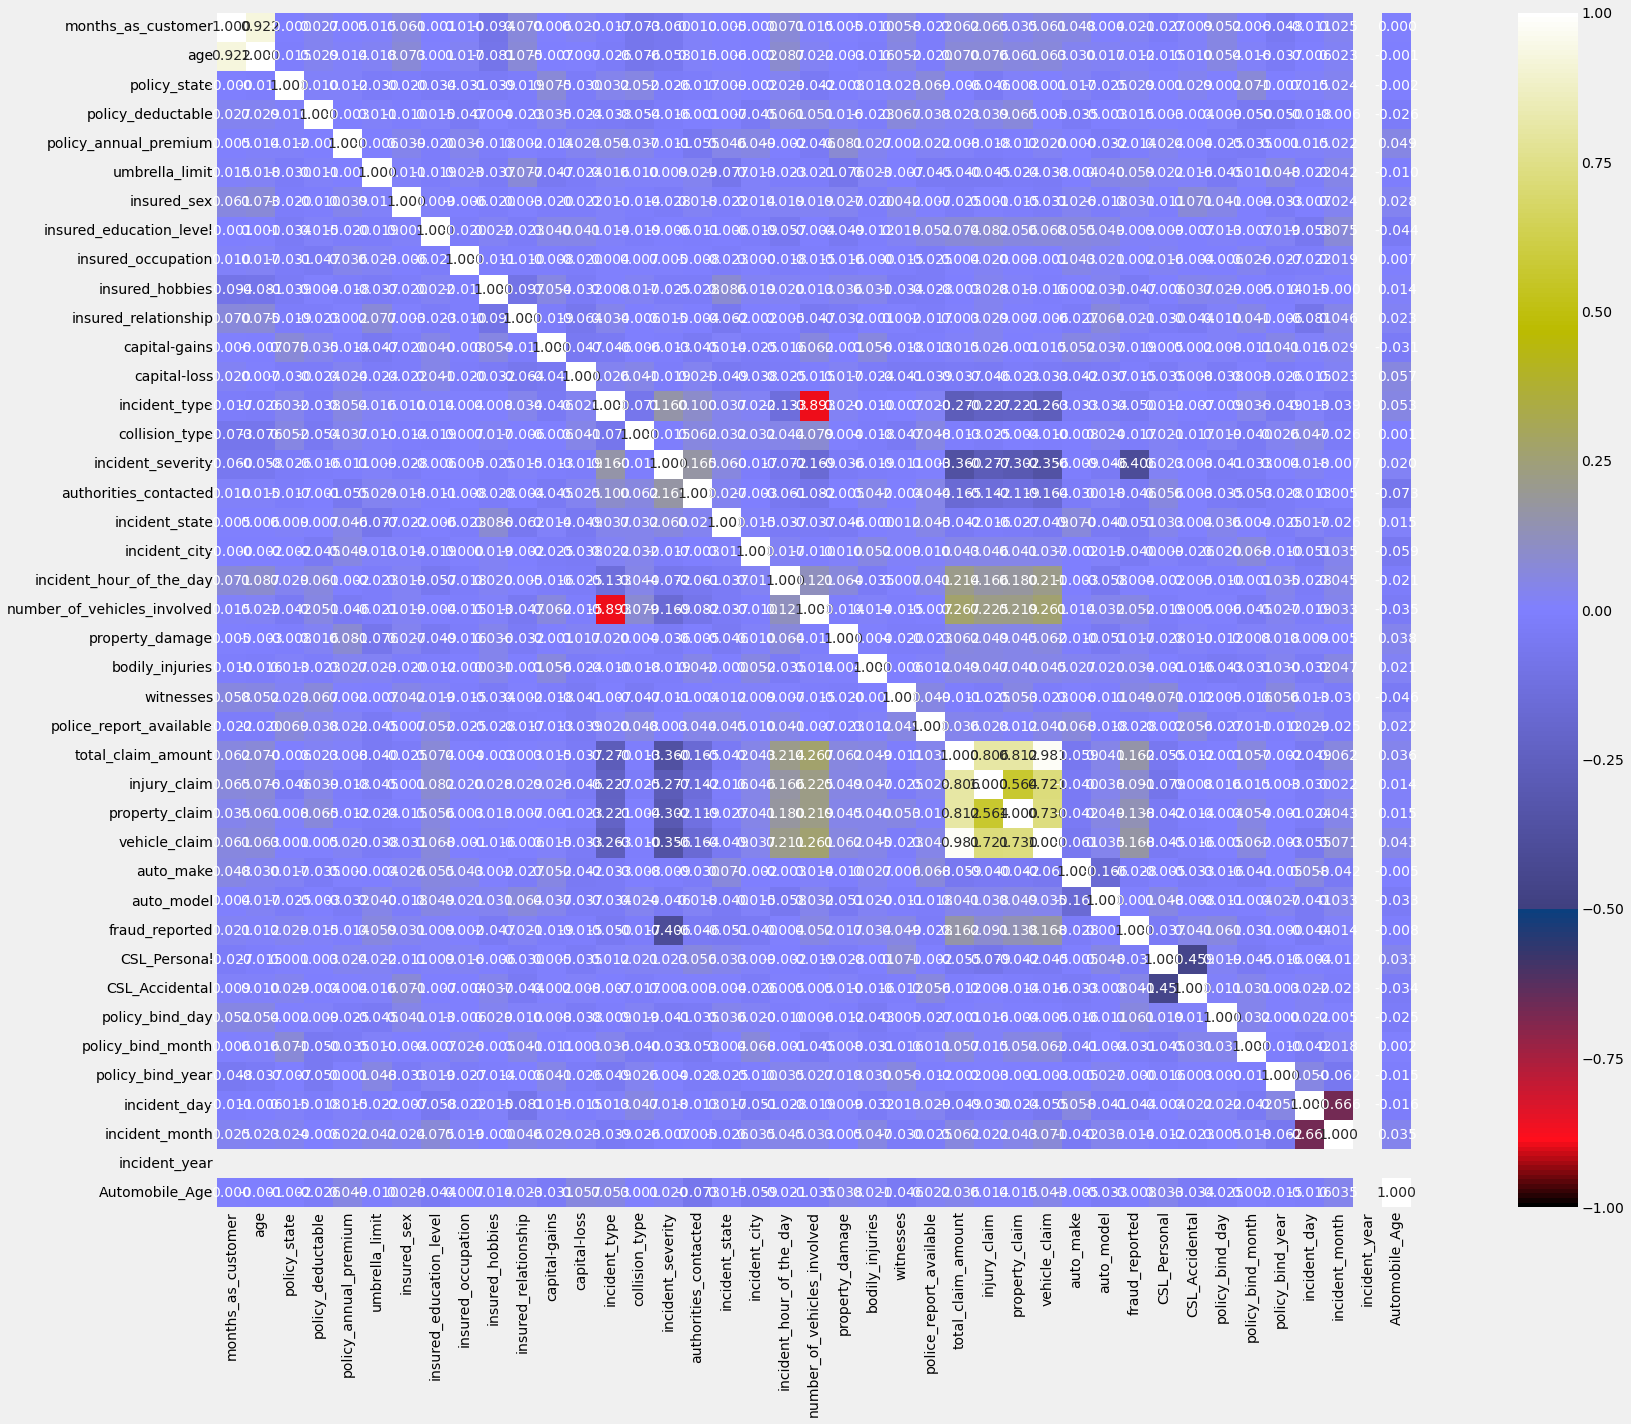

In [56]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

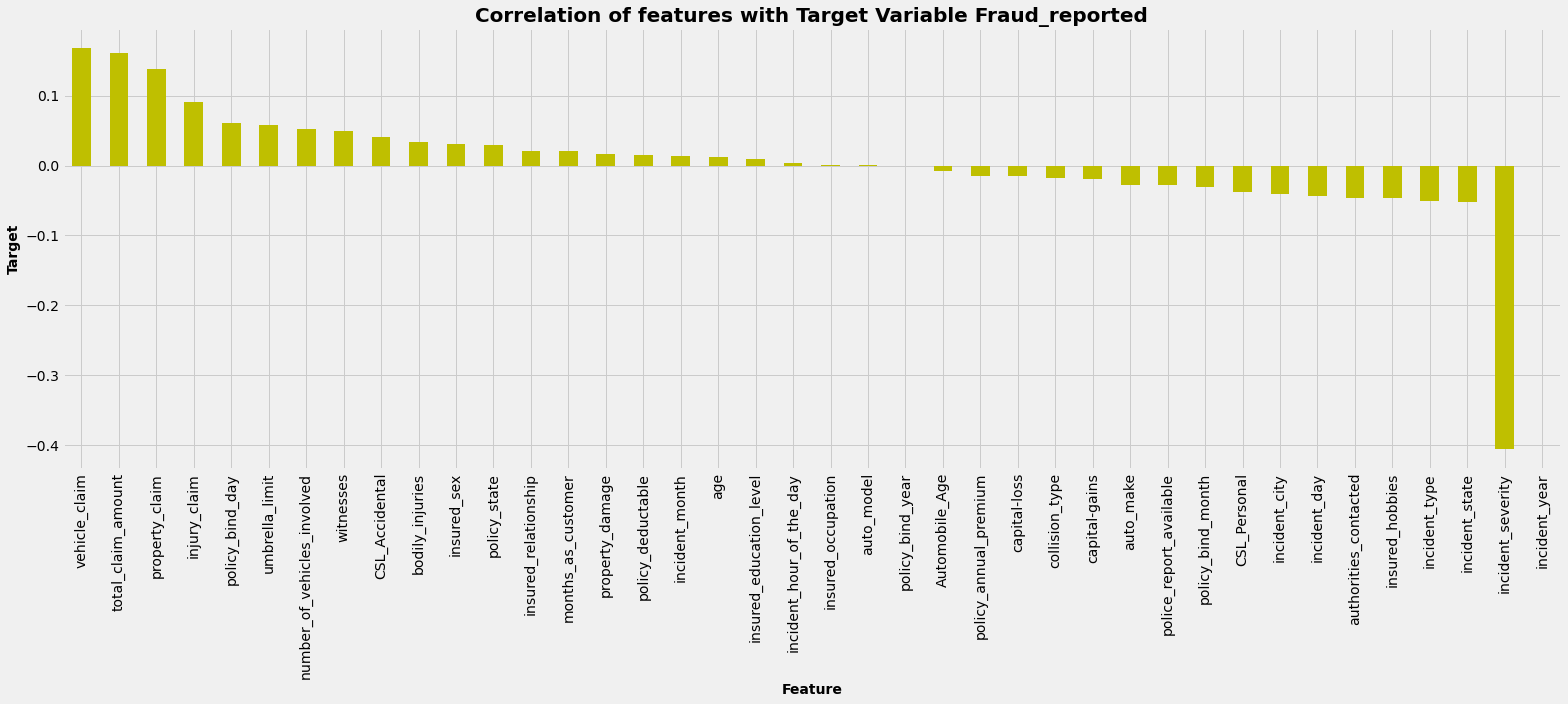

In [57]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

# Balancing Imbalanced target feature

In [58]:
df.fraud_reported.value_counts()


0    753
1    247
Name: fraud_reported, dtype: int64

Balancing using SMOTE


In [59]:
from imblearn.over_sampling import SMOTE


In [60]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [61]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [63]:
Y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

# Standard Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Multicollinearity between features using variance_inflation_factor


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.434692,months_as_customer
1,7.433368,age
2,1.063183,policy_state
3,1.063300,policy_deductable
4,1.047558,policy_annual_premium
5,1.061165,umbrella_limit
6,1.079624,insured_sex
7,1.065210,insured_education_level
8,1.035294,insured_occupation
9,1.082949,insured_hobbies


# PCA


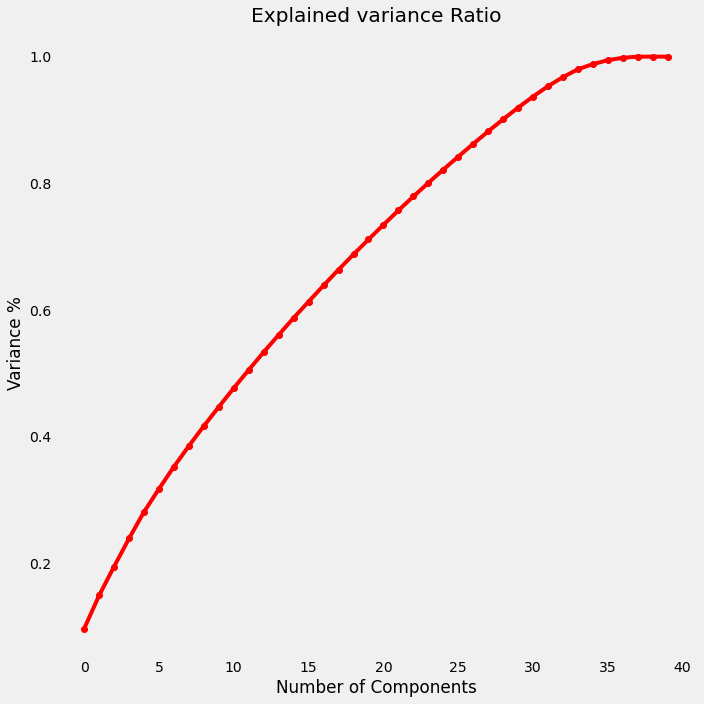

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Comment -

AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.

In [67]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [68]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))


# Machine Learning Model Building


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1054, 28)
Training target vector size: (1054,)
Test feature matrix size: (452, 28)
Test target vector size: (452,)


## Finding best Random state


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8030973451327433 on Random_state 243


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=243, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :','\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression','\n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8030973451327433


Confusion matrix of Logistics Regression : 
 [[190  41]
 [ 48 173]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       231
           1       0.81      0.78      0.80       221

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80       452



In [73]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.49778269417434456
RMSE value for k=  2 is: 0.4412371986661207
RMSE value for k=  3 is: 0.540402996133523
RMSE value for k=  4 is: 0.47504075279302016
RMSE value for k=  5 is: 0.552548400154479
RMSE value for k=  6 is: 0.5
RMSE value for k=  7 is: 0.5779885781398946
RMSE value for k=  8 is: 0.5300692891758904
RMSE value for k=  9 is: 0.5683386750499407
RMSE value for k=  10 is: 0.5362934080044491
RMSE value for k=  11 is: 0.5683386750499407
RMSE value for k=  12 is: 0.5383521234745504
RMSE value for k=  13 is: 0.583701948430678
RMSE value for k=  14 is: 0.5585220699801103
RMSE value for k=  15 is: 0.5874799940107168
RMSE value for k=  16 is: 0.5585220699801103
RMSE value for k=  17 is: 0.5931019402298603
RMSE value for k=  18 is: 0.5722181649673349
RMSE value for k=  19 is: 0.5893599347965238
RMSE value for k=  20 is: 0.5702817189232469


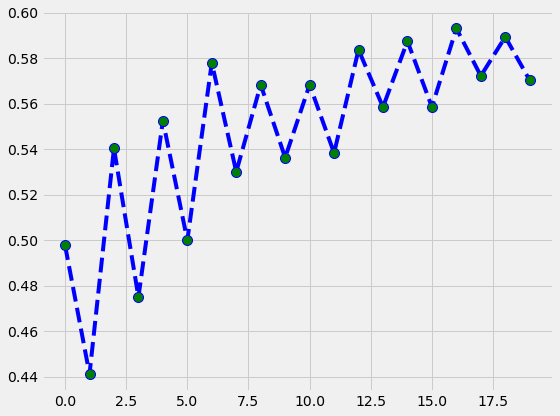

In [75]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

Comment-

At k=2, we get the minimum RMSE value which approximately 0.4745789978762495, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

# Applying other classification algorithm


In [76]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :','\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :','\n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :','\n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score : 
 0.8030973451327433


Confusion matrix : 
 [[190  41]
 [ 48 173]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       231
           1       0.81      0.78      0.80       221

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80       452



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 
 0.827433628318584


Confusion matrix : 
 [[203  28]
 [ 50 171]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       231
           1       0.86      0.77      0.81       221

    accuracy                           0.83       452
   macro avg       0.83      0.83      0.83       452
weighted avg       0.83      0.83      0.83    

# CrossValidation

In [78]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':','\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() : 

Score : [0.59933775 0.67774086 0.79069767 0.84053156 0.87707641]
Mean Score : 0.7570768519944555
Std deviation : 0.10360575898070179




Cross Validation Score SVC() : 

Score : [0.58609272 0.72093023 0.87043189 0.89368771 0.91362126]
Mean Score : 0.7969527623154606
Std deviation : 0.12538720493482908




Cross Validation Score GaussianNB() : 

Score : [0.56622517 0.68106312 0.82724252 0.87707641 0.88704319]
Mean Score : 0.7677300829464697
Std deviation : 0.12477929433327795




Cross Validation Score DecisionTreeClassifier() : 

Score : [0.56953642 0.64451827 0.73421927 0.75083056 0.75747508]
Mean Score : 0.6913159226419661
Std deviation : 0.07318468510230085




Cross Validation Score KNeighborsClassifier(n_neighbors=3) : 

Score : [0.69536424 0.7076412  0.75415282 0.75747508 0.72757475]
Mean Score : 0.7284416184462389
Std deviation : 0.024623282709972997




Cross Validation Score RandomForestClassifier() : 

Score : [0.63907285 0.72

ExtraTreesClassifier is the the best performing model with high accuracy and least difference between Accuracy and cross validation score

# ExtraTreesClassifier

In [79]:
from sklearn.model_selection import GridSearchCV


In [80]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [81]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.796 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.815 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.796 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.796 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.805 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.806 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.777 total time=   0.2s
[CV 3

[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.791 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.768 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.795 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.796 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.777 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.825 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.777 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, 

[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.801 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.801 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.820 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.777 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.790 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.787 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.768 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.834 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.768 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.795 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.806 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.801 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.820 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.768 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_sam

[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.833 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.815 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.791 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.834 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.787 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.819 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.825 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_sam

[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.815 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.853 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.796 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.795 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=0.791 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=0.796 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=0.829 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, 

[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.810 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.819 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.815 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.801 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.834 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.801 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.790 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=20, max_features=sqrt, min_sam

[CV 1/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.820 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.820 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.858 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.791 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.819 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.825 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.806 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=20, max_features=log2, min_sam

[CV 3/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.853 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.777 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.819 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.820 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.825 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.801 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.796 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=30, max_features=auto, min_sam

[CV 5/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=0.781 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.806 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.815 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.820 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.787 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.814 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.844 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=30, max_features=sqrt, min_sa

[CV 3/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.825 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.782 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.810 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.815 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.796 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.839 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.787 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=30, max_features=sqrt, 

[CV 1/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.810 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.791 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.853 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.806 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.829 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.834 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.801 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=30, max_features=log2, min_sam

[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.834 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.773 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.790 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.791 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.782 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.820 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.763 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=10, ma

[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.800 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.806 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.791 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.810 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.777 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.786 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.815 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, ma

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.782 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.773 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.810 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.754 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.781 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.791 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.791 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.791 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.820 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.763 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.786 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.791 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.787 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.810 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=10, ma

[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.825 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.782 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.805 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.806 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.796 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.858 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.806 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=20, ma

[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.791 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.824 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.829 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.829 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.844 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.777 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.814 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=20, ma

[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.790 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.801 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.801 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.834 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.806 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.810 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=3, n_estimators=100;, score=0.820 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=

[CV 1/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.815 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.796 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.848 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.796 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.790 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.810 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.777 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=20, 

[CV 2/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.806 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.853 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.796 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.833 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.815 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.820 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=30, ma

[CV 3/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.839 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.791 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.814 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.796 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.782 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.825 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.791 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=30, ma

[CV 4/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.791 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.800 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100;, score=0.834 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100;, score=0.825 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100;, score=0.839 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100;, score=0.801 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100;, score=0.824 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=30, 

[CV 5/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.795 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.801 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.820 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.787 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.790 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=200;, score=0.815 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=5)

In [82]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 300}

# Final Model


In [83]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 300, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :','\n', accuracy_score(Y_test, y_pred))

Accuracy Score : 
 0.8407079646017699


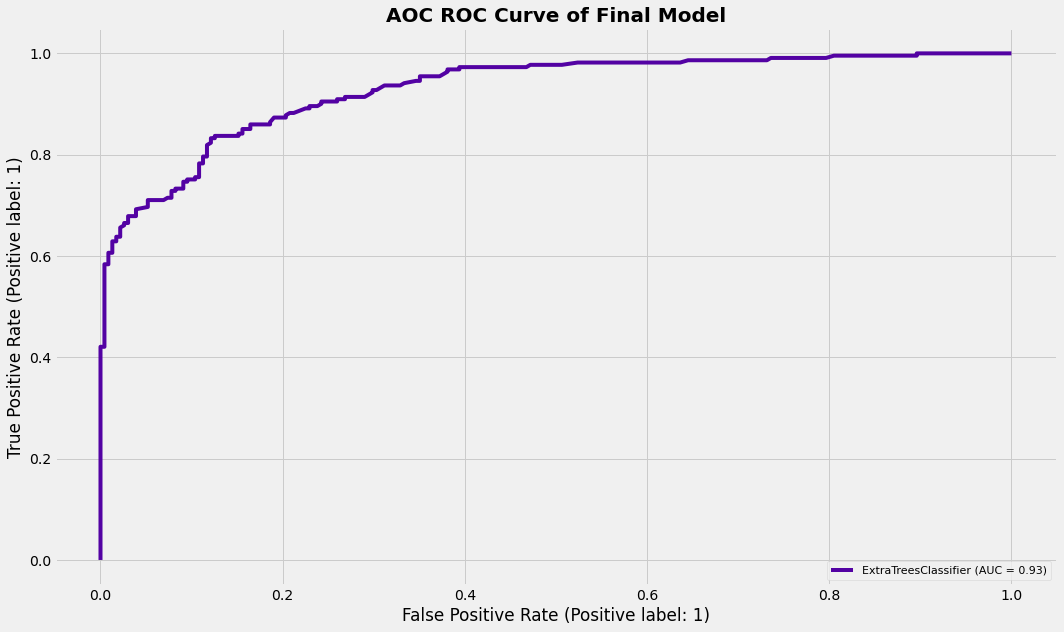

Auc Score : 
 0.8397484868073102


In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('Auc Score :','\n',auc_score)

# Saving model


In [85]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Fraud.pkl')

['Insurance_claims_Fraud.pkl']

# Regression

